# Create a subset of cifar10 to make it easier to test likelihoods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
def save_subset( batch_num, class_nums ):
    # Load the batch
    data_np0 = np.fromfile( 
        "./data/full/cifar-010-bin/data_batch_{}.bin".format( batch_num ), 
        dtype="uint8" )
    
    # Organize the data and labels
    data_np = np.reshape( data_np0, (-1,3073) ) # 3073 = 32x32x3+1
    labels  = data_np[:,0]
    data_np = data_np[:,1:]
    
    # Pull out all the examples from the desired classes
    flag = False
    for cc in class_nums:
        flag = np.logical_or( flag, labels==cc )
    
    data_out   = data_np[flag,:]
    labels_out = labels[flag]
    
    # Save the desired classes back to disk for future use
    all_out = np.concatenate( (np.expand_dims( labels_out, 1 ), data_out), axis=1 )
    
    all_out.tofile( 
        "./data/partial/cifar-010-bin/data_batch_{}.bin".format( batch_num ) )
    
    print( "Resaved batch {} with {} examples".format( batch_num, np.sum( flag ) ) )
    
    return data_out, labels_out

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def subset2tfr( batch_num, class_nums, output_file ):
    with tf.python_io.TFRecordWriter( output_file ) as record_writer:
        for bb in range( batch_num ):
            save_data, save_labels = save_subset( bb+1, class_nums )
            
            for ii in range( np.shape( save_data )[0] ):
                features = tf.train.Features( feature={
                    'image': _bytes_feature( save_data[ii,:].tobytes() ), 
                    'label': _int64_feature( save_labels[ii] )
                } )
                example = tf.train.Example( features=features )
                record_writer.write( example.SerializeToString() )
            
def train2tfr():
    # Load the batch
    data_np0 = np.fromfile( 
        "./data/full/cifar-010-bin/test_batch.bin", 
        dtype="uint8" )
    
    output_file = "./data/full/cifar-010-bin/test_batch.tfrecords"
    
    # Organize the data and labels
    data_np     = np.reshape( data_np0, (-1,3073) ) # 3073 = 32x32x3+1
    save_labels = data_np[:,0]
    save_data   = data_np[:,1:]
    
    with tf.python_io.TFRecordWriter( output_file ) as record_writer:
        for ii in range( np.shape( save_data )[0] ):
            features = tf.train.Features( feature={
                'image': _bytes_feature( save_data[ii,:].tobytes() ), 
                'label': _int64_feature( save_labels[ii] )
            } )
            example = tf.train.Example( features=features )
            record_writer.write( example.SerializeToString() )


In [3]:
batch_num = 5
classes = [3,5]

In [4]:
output_file = "./data/full/cifar-010-bin/data.tfrecords"
subset2tfr( batch_num, [0,1,2,3,4,5,6,7,8,9], output_file )

output_file = "./data/partial/cifar-010-bin/data.tfrecords"
subset2tfr( batch_num, classes, output_file )
train2tfr( )

# for batch_num in range( 5 ):
#     save_subset( batch_num+1, classes )

Resaved batch 1 with 10000 examples
Resaved batch 2 with 10000 examples
Resaved batch 3 with 10000 examples
Resaved batch 4 with 10000 examples
Resaved batch 5 with 10000 examples
Resaved batch 1 with 1953 examples
Resaved batch 2 with 1983 examples
Resaved batch 3 with 2026 examples
Resaved batch 4 with 1997 examples
Resaved batch 5 with 2041 examples


Everything below this point was testing to build everything above

In [5]:
batch_num=3

label_bytes = 1  # 2 for CIFAR-100
height = 32
width = 32
depth = 3
image_bytes = height * width * depth
# Every record consists of a label followed by the image, with a
# fixed number of bytes for each.
record_bytes = label_bytes + image_bytes

In [6]:
data_np0 = np.fromfile( "./data/full/cifar-010-bin/data_batch_{}.bin".format( batch_num ) , dtype="uint8" )

In [7]:
data_np = np.reshape( data_np0 , (-1,record_bytes) )
labels  = data_np[:,0]
data_np = data_np[:,1:]

In [8]:
np.shape( data_np )

(10000, 3072)

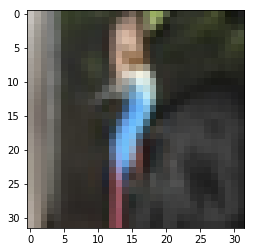

In [9]:
example = data_np[9,:]
example = np.transpose( np.reshape( example, (3,32,32) ), (1,2,0) )
np.shape( example )
plt.imshow( example )

In [10]:
next( ind for ind, lbl in enumerate(labels) if lbl==3 )

7

In [11]:
flag = np.logical_or( labels==3, labels==5 )

In [12]:
data_out   = data_np[flag,:]
labels_out = labels[flag]

In [13]:
np.concatenate( (np.expand_dims( labels_out, 1 ), data_out), axis=1 ).tofile( 
    "./data/partial/cifar-010-bin/data_batch_{}.bin".format( batch_num )
)